#### **Vaidehi Vatsaraj**
#### **2018130060**

# Data Science, 2022
## Tut 2: Feature Engineering: Dimensional Reduction


# Q.1: What is ‘Curse of Dimensionality’? Explain 

1. The curse of dimensionality is a problem that arises when data consists of high number of 

---

features. This type of data is known as high dimensional data. The dimension of the data represent the number of features/columns present in the dataset.
2. The increase in number of features does not always improve the performance of the model. The studies show that, including more number of features might actually leads to worse performance.
3. The problem with high dimensional data is that it becomes difficult to identify meaningful patterns while analyzing dataa and it degrades the accuracy of model while also decreasing the computation speed. Hence the training becomes slower as the dimensions increase.
4. With the increase in dimensions, there are more chances for the occurrence of multicollinearity as well.

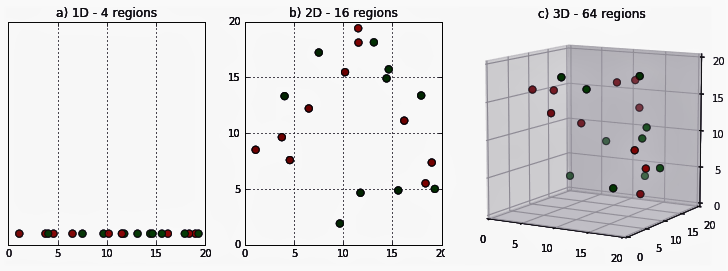


Suppose we have 4 data points in one dimension(only one feature in the data set). So, it can be easily represented with the help of a line and the dimension space is equal to 4.

Now if we add one more feature, then this will cause an increase in dimension space to 4*4 =16. Again if we add one more feature to it, dimension space will increase to 4*4*4 = 64, and so on (4 dimensions(4*4*4*4=256) etc.). So as the dimensions keep on increasing, dimensions space increases exponentially.

**Hughes Phenomenon**

This phenomenon states that “with a fixed number of training samples, the average (expected) predictive power of a classifier or regressor first increases as the number of dimensions or features used is increased but beyond a certain dimensionality it starts deteriorating instead of improving steadily”.

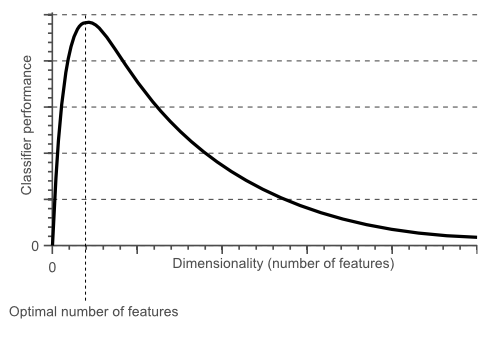

So, with the increase in the no. of dimensions, it becomes very cumbersome to calculate distance between observations as well, and hence, all the Machine Learning algorithm that relies on calculating distance between observations find it very troublesome to work with high dimensional data, such as segmentation and clustering algorithms like KNN, K-Means etc.

**Solution - Dimensionality Reduction***

Dimensionality reduction is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its natural dimension or in simple words, it means reducing the dimensions of our data set. 

Dimensionality Reduction can be divided into two types, Feature Selection and Feature Extraction.

# Q.2: What is feature selection? Why is it needed? What are the different approaches of feature selection?

**Feature Selection**

* Feature selection is the process of selecting a minimum number of features such that the probability distribution of different classes, given the values for their features, is as close as possible to original distribution
* Feature selection is performed by either including the important features or excluding the irrelevant features in the dataset without changing them.

**Need for Feature Selection**

* Feature Selection is needed to avoid the 'Curse of Dimensionality'
*  It is necessary to provide a pre-processed and good input dataset in order to get better outcomes.
* It is needed to simplify the model so that it can be easily interpreted by the researchers.
* It is implemented to reduce the training time and avoid overfitting, enhancing generalization.

**Feature Selection Techniques**

There are mainly two types of Feature Selection techniques, which are:

* **Supervised Feature Selection technique** - Consider the target variable and can be used for the labelled dataset.
* **Unsupervised Feature Selection technique** - Ignore the target variable and can be used for the unlabelled dataset.

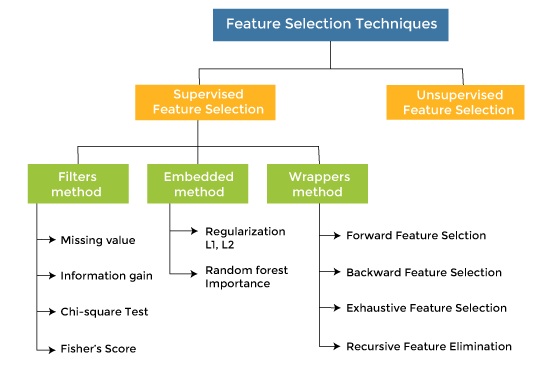

There are mainly three techniques under supervised feature Selection:


1. **Wrapper Methods**

In wrapper methodology, selection of features is done by considering it as a search problem, in which different combinations are made, evaluated, and compared with other combinations. It trains the algorithm by using the subset of features iteratively.

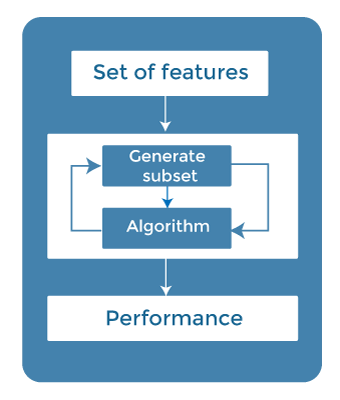

On the basis of the output of the model, features are added or subtracted, and with this feature set, the model has trained again.

Some techniques of wrapper methods are:

* **Forward selection** - Forward selection is an iterative process, which begins with an empty set of features. After each iteration, it keeps adding on a feature and evaluates the performance to check whether it is improving the performance or not. The process continues until the addition of a new variable/feature does not improve the performance of the model.
* **Backward elimination** - Backward elimination is also an iterative approach, but it is the opposite of forward selection. This technique begins the process by considering all the features and removes the least significant feature. This elimination process continues until removing the features does not improve the performance of the model.
Exhaustive Feature Selection- Exhaustive feature selection is one of the best feature selection methods, which evaluates each feature set as brute-force. It means this method tries & make each possible combination of features and return the best performing feature set.
* **Recursive Feature Elimination** - Recursive feature elimination is a recursive greedy optimization approach, where features are selected by recursively taking a smaller and smaller subset of features. Now, an estimator is trained with each set of features, and the importance of each feature is determined using coef_attribute or through a feature_importances_attribute.


2. **Filter Methods**

In Filter Method, features are selected on the basis of statistics measures. This method does not depend on the learning algorithm and chooses the features as a pre-processing step.

The filter method filters out the irrelevant feature and redundant columns from the model by using different metrics through ranking.

The advantage of using filter methods is that it needs low computational time and does not overfit the data.

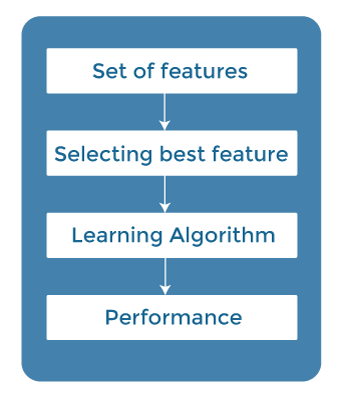

Some common techniques of Filter methods are as follows:

* **Information Gain**: Information gain determines the reduction in entropy while transforming the dataset. It can be used as a feature selection technique by calculating the information gain of each variable with respect to the target variable.

* **Chi-square Test**: Chi-square test is a technique to determine the relationship between the categorical variables. The chi-square value is calculated between each feature and the target variable, and the desired number of features with the best chi-square value is selected.

* **Fisher's Score**: Fisher's score is one of the popular supervised technique of features selection. It returns the rank of the variable on the fisher's criteria in descending order. Then we can select the variables with a large fisher's score.

* **Missing Value Ratio**: The value of the missing value ratio can be used for evaluating the feature set against the threshold value. The formula for obtaining the missing value ratio is the number of missing values in each column divided by the total number of observations. The variable is having more than the threshold value can be dropped.


3. **Embedded Methods**

Embedded methods combined the advantages of both filter and wrapper methods by considering the interaction of features along with low computational cost. These are fast processing methods similar to the filter method but more accurate than the filter method.

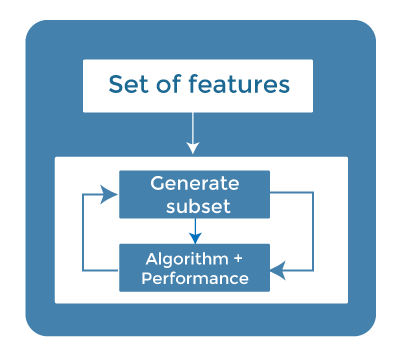

These methods are also iterative, which evaluates each iteration, and optimally finds the most important features that contribute the most to training in a particular iteration. Some techniques of embedded methods are:

* **Regularization** - Regularization adds a penalty term to different parameters of the machine learning model for avoiding overfitting in the model. This penalty term is added to the coefficients; hence it shrinks some coefficients to zero. Those features with zero coefficients can be removed from the dataset. The types of regularization techniques are L1 Regularization (Lasso Regularization) or Elastic Nets (L1 and L2 regularization).
* **Random Forest Importance** - Different tree-based methods of feature selection help us with feature importance to provide a way of selecting features. Here, feature importance specifies which feature has more importance in model building or has a great impact on the target variable. Random Forest is such a tree-based method, which is a type of bagging algorithm that aggregates a different number of decision trees. It automatically ranks the nodes by their performance or decrease in the impurity (Gini impurity) over all the trees. Nodes are arranged as per the impurity values, and thus it allows to pruning of trees below a specific node. The remaining nodes create a subset of the most important features.


# Problem 1: Linear Discriminant Analysis (LDA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import StandardScaler
from itertools import cycle

## Dataset

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
print(X.shape, y.shape)

(1000, 10) (1000,)


## Model

In [ ]:
model = LinearDiscriminantAnalysis()

## Model Evaluation

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.893 (0.033)


## Data Partition (80% for training and 20% for testing) (Use scikit-learn)


In [ ]:
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
model.get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

## Prediction

In [ ]:
y_pred = model.predict(X_test)

## Test Accuracy

In [ ]:
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred) * 100,3)} %" )

Test Accuracy: 91.0 %


## Confusion Matrix

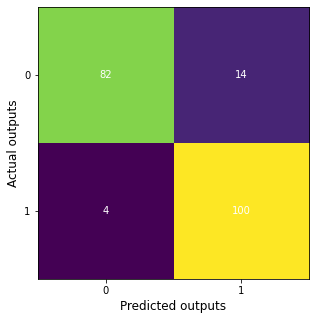

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        96
           1       0.88      0.96      0.92       104

    accuracy                           0.91       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



## ROC Curve and AUC for each Class

In [ ]:
y_prob = model.predict_proba(X_test)

y_prob = y_prob[:, 1]

n_classes = len(model.classes_)

fpr, tpr,_ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

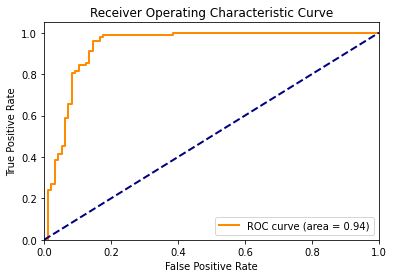

In [ ]:
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

## Tuning the model

In [ ]:
# define model
LDA = LinearDiscriminantAnalysis()

# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
LDAparam_grid = {
    'shrinkage' : np.arange(0, 1, 0.01),
    'solver': ['lsqr', 'eigen']
}

In [ ]:
LDA_search = GridSearchCV(LDA, param_grid=LDAparam_grid, verbose = 3, scoring='accuracy', cv=cv)

# fitting the model for grid search 
LDA_search.fit(X , y)

Streaming output truncated to the last 5000 lines.
[CV 11/30] END ....shrinkage=0.16, solver=eigen;, score=0.880 total time=   0.0s
[CV 12/30] END ....shrinkage=0.16, solver=eigen;, score=0.870 total time=   0.0s
[CV 13/30] END ....shrinkage=0.16, solver=eigen;, score=0.920 total time=   0.0s
[CV 14/30] END ....shrinkage=0.16, solver=eigen;, score=0.930 total time=   0.0s
[CV 15/30] END ....shrinkage=0.16, solver=eigen;, score=0.890 total time=   0.0s
[CV 16/30] END ....shrinkage=0.16, solver=eigen;, score=0.920 total time=   0.0s
[CV 17/30] END ....shrinkage=0.16, solver=eigen;, score=0.910 total time=   0.0s
[CV 18/30] END ....shrinkage=0.16, solver=eigen;, score=0.840 total time=   0.0s
[CV 19/30] END ....shrinkage=0.16, solver=eigen;, score=0.900 total time=   0.0s
[CV 20/30] END ....shrinkage=0.16, solver=eigen;, score=0.810 total time=   0.0s
[CV 21/30] END ....shrinkage=0.16, solver=eigen;, score=0.890 total time=   0.0s
[CV 22/30] END ....shrinkage=0.16, solver=eigen;, score=0.

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                         'solver': ['lsqr', 'eigen']},
             scoring='accuracy', verbose=3)

In [ ]:
# summarize
print('Mean Accuracy: %.3f' % LDA_search.best_score_)
print('Best Parameters: %s' % LDA_search.best_params_)

Mean Accuracy: 0.894
Best Parameters: {'shrinkage': 0.02, 'solver': 'lsqr'}


In [ ]:
LDA_tuned = LinearDiscriminantAnalysis(**LDA_search.best_params_)

In [ ]:
LDA_tuned.fit(X_train, y_train)

LinearDiscriminantAnalysis(shrinkage=0.02, solver='lsqr')

### Prediction

In [ ]:
y_pred = LDA_tuned.predict(X_test)

### Test Accuracy

In [ ]:
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred) * 100,3)} %" )

Test Accuracy: 90.5 %


## Confusion Matrix

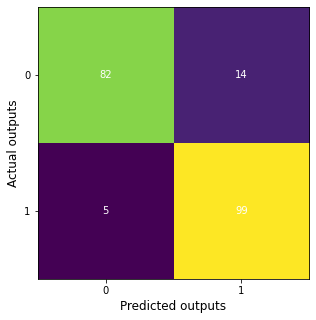

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.90        96
           1       0.88      0.95      0.91       104

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200



### ROC Curve and AUC for each Class

In [ ]:
y_prob = LDA_tuned.predict_proba(X_test)

y_prob = y_prob[:, 1]

n_classes = len(LDA_tuned.classes_)

fpr, tpr,_ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

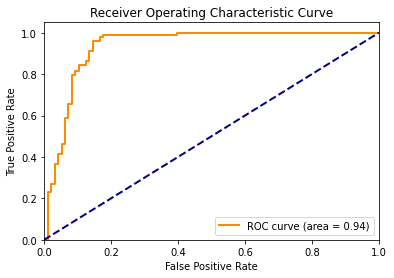

In [ ]:
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

## References

1. The Curse of Dimensionality and its Cure
https://medium.com/analytics-vidhya/the-curse-of-dimensionality-and-its-cure-f9891ab72e5

2. Feature Selection Techniques in Machine Learning
https://www.javatpoint.com/feature-selection-techniques-in-machine-learning
